# Deep Networks - Lab: Building an Image Classifier

## Introduction

In this lab, we'll create a network with more than one hidden layer from scratch. The outline of this lab will be roughly the same as the previous two labs, but you'll notice that adding more hidden layers makes forward and backward propagation more complex. This is what you'll do:

- You'll start with initializing the parameters in all the layers.
- You'll implement the forward propagation module:
     - First, you'll combine a linear step and a activation function in a linear forward function.
     - Next, you'll stack the linear forward function L-1 time with a RELU activation function (for layers 1 through L-1) and then add a sigmoid layer at the end (for the final layer $L$). 
- You'll create the loss function.
- You'll mplement the backward propagation module using three helper functions:
    - First, you'll create a function for linear part of a layer's backward propagation step.
    - Next, we'll tell you how to get the gradients for the activation functions (RELU and sigmoid) and you'll implement this along with the linear part of the activation step to create a backward function.
    - Lastly, you'll stack the backward function L-1 times with the RELU activation and add the sigmoid activation in the $L$th layer in a new L_model_backward function
- You'll conclude your model with updating the parameters
- At the end of this lab, you'll combine all the helper functions in a function called `L_layer_model` and apply this model to the Santa data set you've used before!

## Objectives

You will be able to:
* Explain the architecture of a neural network
* Load and display images from file
* Batch load and process directories of images using Keras
* Code a multi-layer neural network from scratch

## 1. Packages

First, let's import all the packages that you 'll need for this lab.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(123)

## 2. Initialization in an L-layer Neural Network

Let's look at the initialization function you created in the previous lab. We'll try to convert this helper function to a function that can be used in a setting with $L$ layers.

Remember from the previous lab that, with one hidden layer, we initialized W and b as follows:

```python
def initialize_parameters(n_0, n_1, n_2):
    np.random.seed(123) 
    W1 = np.random.randn(n_1, n_0) * 0.05 
    b1 = np.zeros((n_1, 1))
    W2 =  np.random.randn(n_2, n_1) * 0.05 
    b2 = np.zeros((n_2, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
```

We want to generalize this function such that the parameter initialization function takes a list of arbitrary length instead of `(n_0, n_1, n_2)`, and computes as many `W`'s and `b`'s as there are layers, (hence, L of each). In this function, you'll loop over the list which is entered as an argument in `initialize_parameters_deep`. For each layer $l$, initialize $W^{[l]}$ and $b^{[l]}$.

To make it a little easier, recall from the lexture that 

$$W^{[l]}: (n^{[l]}, n^{[l-1]})$$

$$b^{[l]}: (n^{[l]}, 1)$$

In [2]:
def initialize_parameters_deep(n_layer):
    
    np.random.seed(123)
    parameters = {}
    L = len(n_layer)           

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(n_layer[l], n_layer[l-1])*0.05
        parameters['b' + str(l)] = np.zeros((n_layer[l], 1))
        
    return parameters

## 3. Forward propagation

### 3.1. Linear forward and activation for 1 layer
Let's start building on a propagation module. As you know, in each layer of nodes $l$, two things happen

- A linear transformation $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$, where $A^{[0]} = X$. You may also find `np.dot()` useful here.
- An activation function is applied to the linear transformation. in this lab, the two activation functions are used in the neural network are:
    - *Sigmoid*: $A^{[l]} = \sigma(Z^{[l]}) = \frac{1}{ 1 + e^{-(Z^{[l]})}}$. You can          program this in python using `np.exp()`.
    - *ReLU*: The mathematical formula for ReLu is $A^{[l]} $= RELU$(Z^{[l]})$ =$ \max(0, Z^{[l]})$. You can  program this in python using `np.maximum()`.

The output of this function will be the activation A. Additionally, we save some intermediate values for our backpropagation later on. Define `1inear_cache` saves the elements of the linear transformation `(A_prev, W, b)`, `activation_cache` save `Z`. They are stored together in one dictionary, `cache`.

In [4]:
#Complete the templated function below as indicated by the comments
#Be sure to also carefully review the function in general in order to continue building your understanding.
def linear_activation_forward(A_prev, W, b, activation):
 
    Z = np.dot(W, A_prev) + b #Your code here; see the linear transformation above for how to compute Z
    linear_cache = (A_prev, W, b)
    activation_cache = Z
    
    #Here we define two possible activation functions
    if activation == "sigmoid":
        A = 1/(1+np.exp(-Z)) #Your code here; use the appropriate function for a sigmoid activation function
    
    elif activation == "relu":
        A = np.maximum(0,Z) #Your code here; use the appropriate function for the ReLU activation function.
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

### 3.2 Extending to  L layers

In this lab, we'll build a neural network with $L-1$ RELU layers and the last layer L with a SIGMOID activation function. Let's build a function that implements this using `linear_activation_forward()`.

The second argument of the function `L_model_forward` is `parameters`. Recall that this is a dictionary storing (initialized) parameters `W` and `b` for each layer of the network. We'll loop over all the values of W and b, and they are inputs of the function `linear_activation_forward`. Recall that you can use something like this to loop over `W1`, `W2`, etc.: `parameters['W'+ str(i)]` with `i` the index value.

We denote `AL` the output of the last layer (so, $\hat y$).


Make sure to keep track of the caches in the "caches" list. To add a new value `cache` to a `list`, you can use `list.append(cache)`.

In [5]:
#Once again, complete this templated function as indicated by the comments provided.
def L_model_forward(X, parameters):
    #Initialize a cache list to keep track of the caches
    caches = [] #Your code here
    A = X
    L = len(parameters) // 2 # number of layers in the neural network
    
    # Implement the RELU activation L-1 times. Add "cache" to the "caches" list.
    #Your code here
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W'+ str(l)], parameters['b' + str(l)], activation = "relu")        
        caches.append(cache)
    
    # Implement the sigmoid function for the last layer. Add "cache" to the "caches" list.
    #Your code here
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


Great! Now you have a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". 

## 4. The cost function

Just like in the last lab, the activation in the last layer provides us with the preditions on all the samples. The activations were denoted as $a^{[2] (i)}$ in the last lab (where we had one hidden layer), here they are 
$a^{[L] (i)}$, or our vectorized $A^{[L]}$ output from `L_model_forward`. The resulting cross-entropy cost is essentially the same:

$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) $$



In [6]:
#Complete the templated function below, as indicated by the comments.
def compute_cost(AL, Y):
        
    m = Y.shape[1]

    cost = -(1/m)* np.sum((Y*np.log(AL))+ (1-Y)*np.log(1-AL)) #Your code here; use the formula above to calculate the cost.
    cost = np.squeeze(cost)      # To make sure to get shape right (e.g. turn [[17]] into 17)
    
    return cost

## 5. Backward propagation

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

$$dz^{[1]}= \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} $$

$$dW^{[1]} =  \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}} }\frac{\partial z^{[1]} }{\partial W^{[1]}}$$

$$db^{[1]} =  \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}} }\frac{\partial z^{[1]} }{\partial b^{[1]}}$$

You are going to build the backward propagation in three steps:
- First let's build a `linear_backward` function
- Then let's build a libear --> activation backward function where the activation computes the derivative of either the ReLU or sigmoid activation
- lastly, let's backpropagate through the entire model

### 5.1 Linear backward

***CHANGE THIS*** TRY TO DO LINEAR AND NON-LINEAR IN 1 FUNCTION

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]} dA^{[l-1]})$.


The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


**Exercise**: Use the 3 formulas above to implement linear_backward().

In [7]:
#Complete the skeleton function below
def linear_backward(dZ, cache):
    A_prev, W, b = cache #Unpacking our complex object
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ,A_prev.T) #Your code here; see the formulas above
    db = (1/m) * np.sum(dZ, axis =1, keepdims = True) #Your code here; see the formulas above
    dA_prev = np.dot(W.T , dZ) #Your code here; see the formulas above
    
    return dA_prev, dW, db

### 5.2  Linear and activation backward


Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. Recall that $ dZ^{[l]}= dA ^{[l]} * g^{[l]'} (Z^{[l]})$, and for sigmoid $g^{[l]'} (Z^{[l]}) = \dfrac{1}{(1+\exp(-Z))}\biggr(1- \dfrac{1}{(1+\exp(-Z))}\biggr) $


```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  


In [8]:
#Complete the skeleton function below
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    Z= activation_cache
    
    if activation == "sigmoid": 
        s = 1/(1+np.exp(-Z))  #Your code here; see the formula above
        dZ = dA * s * (1-s) #Your code here; see the formula above
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "relu":
        dZ = np.array(dA, copy=True) # just converting dz to a correct object.
        dZ[Z <= 0] = 0 #Your code here; see the formula above
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

### 5.3 - L-Model Backward 

***CHANGE THIS***

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 

** Initializing backpropagation**:
To backpropagate through this network, we know that the output is, 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost wrt AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

**Exercise**: Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [9]:
#Complete the skeleton function below (there are 3 lines that need to be completed)
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) #Your code here; see the code snippet above
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid") #Your code here; use the helper function defined above
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # (RELU -> LINEAR) gradients
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu") #Your code here; use the helper function defined above
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

## 6  Parameter updates

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 


In [10]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural network
    
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

## 7.  The data 

First, let's take a look at how to load a raw image from file and display it:

In [12]:
!pip install PIL

  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
import matplotlib.image as mpimg
filename = 'data/validation/santa/00000448.jpg'
img=mpimg.imread(filename)
plt.imshow(img)
print(img.shape)
plt.show()

ValueError: Only know how to handle extensions: ['png']; with Pillow installed matplotlib can handle more images

Great!  

Now let's take a look at how we can 

Examine the gist of this code, but don't worry if you don't understand all the ins and out of the keras preprocessing method `ImageDataGenerator`. We'll explain in more detail when working with convolutional neural networks. The import piece to note here is the drastic image downgrade that we're doing here. The raw images would contain far more information but this would also be costly in time and hardware resources.

In [14]:
import time
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

ModuleNotFoundError: No module named 'PIL'

In [15]:
# directory path
train_data_dir = 'data/train'
test_data_dir = 'data/validation'

# get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=132) 

# get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=790)

# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

NameError: name 'ImageDataGenerator' is not defined

Note the drastic difference of one of these images as compared to the raw file:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


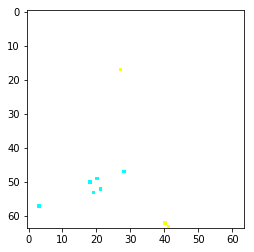

In [38]:
print(train_images[0].shape)
plt.imshow(train_images[0])

## Data Exploration and Normalization

Be sure to carefully review the three code blocks below. Here, we demonstrate some common data checks you are apt to perform after importing, followed by standard data normalization to set all values to a range between 0 and 1.

In [ ]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images_orig shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

In [ ]:
# Reshape the training and test examples 
train_img = train_images.reshape(train_images.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_img = test_images.reshape(test_images.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_img/255.
test_x = test_img/255.

print ("train_img's shape: " + str(train_img.shape))
print ("test_img's shape: " + str(test_img.shape))


Output needs to be of shape $(1, X_n)$

In [ ]:
# Reshape the labels
train_labels_final = train_labels.T[[1]]
test_labels_final = test_labels.T[[1]]

print ("train_labels_final's shape: " + str(train_labels_final.shape))
print ("test_labels_final's shape: " + str(test_labels_final.shape))

In [ ]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [ ]:
#Review and complete the skeleton function below.
def L_layer_model(X, Y, layers_dims, learning_rate = 0.005, num_iterations = 3000, print_cost=False):#lr was 0.009
    np.random.seed(1)
    costs = []                         
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = #Your code here; use the previous helper functions
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = #Your code here; use the previous helper functions
        
        # Compute cost.
        cost = #Your code here; use the previous helper functions
    
        # Backward propagation.
        grads = #Your code here; use the previous helper functions
 
        # Update parameters.
        parameters = #Your code here; use the previous helper functions
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
parameters = #Your code here; use the helper function defined above

In [ ]:
#No edits needed here; simply review the code below.
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2
    
    # Forward propagation
    probs, caches = L_model_forward(X, parameters)

    # convert probs to 0/1 predictions
    for i in range(0, probs.shape[1]):
        if probs[0,i] > 0.50:
            probs[0,i] = 1
        else:
            probs[0,i] = 0
    
    #print ("predictions: " + str(probs)); print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((probs == y)/m)))
        
    return probs

In [ ]:
pred_train = #Your code here; use the helper function defined above

In [25]:
pred_test = predict(test_img, test_labels_final, parameters) #Your code here; use the helper function defined above

Accuracy: 0.7045454545454546


## 7. Print mislabeled images

Finally, here we demonstrate iterating through our images and printing those that are mislabbeled. Be sure to make note of the code used for displaying these images, similar to what we saw above.

In [26]:
def print_mislabeled_images(classes, X, y, p):
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (90.0, 90.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
      #  plt.title("Prediction: " + list(classes.keys())[list(classes.values()).index(int(p[0,index]))] +
       #           " \n Class: " + list(classes.keys())[list(classes.values()).index(int(y[0,index]))])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

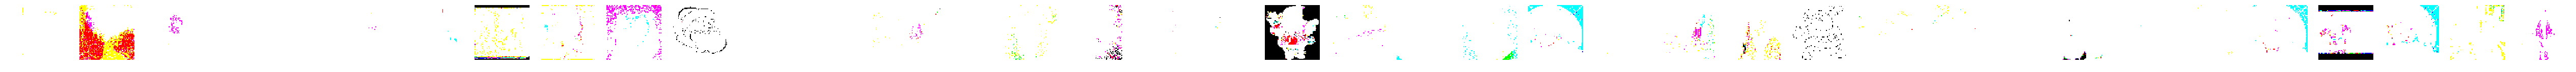

In [27]:
print_mislabeled_images(list(train_generator.class_indices), test_img, test_labels_final, pred_test)

In [39]:
classes = train_generator.class_indices


## Summary

In this lab, you once again practiced and reviewed the process of building a nueral network. This time, we built a more complex network with additional layers which drastically improves the performance on our data set with Santa images! We also made note of some important methods for importing and displaying images, a necessary preliminary step in building image recognition systems.
